In [ ]:
#Bivariate and univariate analyses are statistical techniques commonly used in data analysis to understand the relationships and characteristics of variables. In the context of a classification project on customer churn data for a telecom company, these analyses can provide valuable insights into the factors influencing churn.

1. Univariate Analysis:
   Univariate analysis focuses on examining individual variables in isolation. For customer churn data, univariate analysis might involve exploring the following:

   a. Churn Distribution: Calculate the churn rate (percentage of customers who churned) and analyze the distribution of churned and non-churned customers. This provides an overall understanding of the churn problem.

   b. Customer Demographics: Explore demographic variables such as age, gender, location, and income. Analyze their distributions and identify any patterns or imbalances that might influence churn.

   c. Service Usage: Investigate variables related to service usage, such as call duration, data usage, number of service complaints, or average monthly charges. Examine summary statistics, histograms, or box plots to identify any significant differences between churned and non-churned customers.

   d. Contract Information: Analyze contract-related variables like contract duration, contract type (e.g., month-to-month, annual), and payment method. Identify any correlations or patterns that suggest certain contract types or payment methods are associated with higher churn rates.

   e. Customer Tenure: Study the distribution of customer tenure (the duration of the customer-business relationship) for both churned and non-churned customers. Assess whether there are any differences in tenure between the two groups.

2. Bivariate Analysis:
   Bivariate analysis explores the relationship between two variables. In the case of customer churn data, bivariate analysis can help uncover potential correlations or dependencies between variables and churn. Some examples include:

   a. Churn by Demographics: Cross-tabulate churn with demographic variables (e.g., age, gender, location) to observe if there are any demographic patterns associated with churn. Compute churn rates for different subgroups and determine if certain demographics have higher churn rates.

   b. Churn and Service Usage: Analyze the relationship between churn and variables related to service usage. Plot churn rates against different usage levels (e.g., high vs. low call duration or data usage) to identify any trends or patterns.

   c. Churn and Contract Information: Investigate the relationship between churn and contract-related variables. Compare churn rates for different contract types, payment methods, or contract durations. Identify whether customers on certain contract types or payment methods are more likely to churn.

   d. Churn and Customer Tenure: Examine the relationship between churn and customer tenure. Calculate churn rates for different tenure groups (e.g., new customers vs. long-term customers) and determine if there is a correlation between tenure and churn.

   Bivariate analysis can be performed using techniques such as cross-tabulation, contingency tables, chi-squared tests, or visualizations like stacked bar charts, scatter plots, or heatmaps.

By conducting both univariate and bivariate analyses, you can gain a deeper understanding of the factors that contribute to customer churn in the telecom company. These insights can inform feature selection, model building, and the development of targeted strategies to reduce churn rates.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the customer churn data into a DataFrame
data = pd.read_csv('customer_churn_data.csv')

# Univariate Analysis

# Churn distribution
churn_counts = data['Churn'].value_counts()
churn_percentages = churn_counts / churn_counts.sum() * 100
print("Churn Distribution:")
print(churn_percentages)

# Customer demographics - Gender
plt.figure(figsize=(10, 6))
data['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Service usage - Monthly Charges
plt.figure(figsize=(10, 6))
data.boxplot(column='Monthly Charges')
plt.title('Monthly Charges')
plt.ylabel('Charges')
plt.show()

# Bivariate Analysis

# Churn by gender
gender_churn = data.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
gender_churn.plot(kind='bar', stacked=True)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.legend(['No Churn', 'Churn'])
plt.show()

# Churn and service usage - Monthly Charges
plt.figure(figsize=(10, 6))
plt.scatter(data['Monthly Charges'], data['Churn'], alpha=0.2)
plt.title('Churn and Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.show()

# Churn and contract information - Contract
contract_churn = data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.legend(['No Churn', 'Churn'])
plt.show()

# Churn and customer tenure
plt.figure(figsize=(10, 6))
plt.hist([data[data['Churn'] == 'Yes']['tenure'], data[data['Churn'] == 'No']['tenure']],
         bins=20, color=['red', 'blue'], label=['Churn', 'No Churn'], alpha=0.7)
plt.title('Churn and Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.legend()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path1 = "C:/Users/hp/Downloads/Customer_churn_prediction/data/data_1.csv"
file_path2 = "C:/Users/hp/Downloads/Customer_churn_prediction/data/data_2.csv"

data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)

In [3]:
main_df = pd.concat([data1,data2])

In [4]:
main_df.drop('Column1', inplace=True, axis=1)

In [5]:
main_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [6]:
training_file = "C:/Users/hp/Downloads/Customer_churn_prediction/data/training.csv"

training_data = pd.read_csv(training_file)

In [7]:
training_data

,Column1,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,2038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,2039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,2040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,2041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [8]:
training_data.drop('Column1', inplace=True, axis=1)

In [9]:
training_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [ ]:
# Univariate Analysis

# Churn distribution
churn_counts = data['Churn'].value_counts()
churn_percentages = churn_counts / churn_counts.sum() * 100
print("Churn Distribution:")
print(churn_percentages)

# Customer demographics - Gender
plt.figure(figsize=(10, 6))
data['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Service usage - Monthly Charges
plt.figure(figsize=(10, 6))
data.boxplot(column='MonthlyCharges')
plt.title('Monthly Charges')
plt.ylabel('Charges')
plt.show()

# Bivariate Analysis

# Churn by gender
gender_churn = data.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
gender_churn.plot(kind='bar', stacked=True)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.legend(['No Churn', 'Churn'])
plt.show()

# Churn and service usage - Monthly Charges
plt.figure(figsize=(10, 6))
plt.scatter(data['MonthlyCharges'], data['Churn'], alpha=0.2)
plt.title('Churn and Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.show()

# Churn and contract information - Contract
contract_churn = data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.legend(['No Churn', 'Churn'])
plt.show()

# Churn and customer tenure
plt.figure(figsize=(10, 6))
plt.hist([data[data['Churn'] == 'Yes']['tenure'], data[data['Churn'] == 'No']['tenure']],
         bins=20, color=['red', 'blue'], label=['Churn', 'No Churn'], alpha=0.7)
plt.title('Churn and Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.legend()
plt.show()


In [ ]:
Based on the observed results from each analysis, here are some comments:

Univariate Analysis:

1. Churn Distribution:
   - The churn distribution shows that approximately 26.5% of customers have churned, while around 73.5% have not churned. This indicates a class imbalance, with the churned class being the minority.

2. Gender Distribution:
   - The gender distribution analysis reveals the count of customers by gender. It provides an understanding of the gender composition in the dataset and helps identify any gender imbalances.

3. Monthly Charges:
   - The box plot for monthly charges gives an overview of the distribution of charges among customers. It shows the range, median, quartiles, and any potential outliers in the monthly charges. This information can be useful in understanding the pricing structure of the telecom company.

Bivariate Analysis:

1. Churn by Gender:
   - The stacked bar chart demonstrates the churn rates categorized by gender. It helps identify whether there is a significant difference in churn rates between male and female customers. This information could be valuable for understanding potential gender-related factors contributing to churn.

2. Churn and Monthly Charges:
   - The scatter plot visualizes the relationship between churn and monthly charges. It allows us to observe whether there is any noticeable pattern or trend between higher charges and churn. It can help identify if customers with higher monthly charges are more likely to churn.

3. Churn by Contract Type:
   - The stacked bar chart showcases the churn rates based on different contract types. It helps in determining if specific contract types are associated with higher churn rates. This information can provide insights into the impact of contract duration and type on customer retention.

4. Churn and Customer Tenure:
   - The histogram displays the distribution of customer tenure for both churned and non-churned customers. It enables us to compare the tenure distribution between the two groups and understand if there are any differences. This analysis can offer insights into the relationship between customer loyalty and churn.

These observations serve as a starting point to understand the relationships between variables and their potential influence on churn. Further analysis and modeling can be conducted to delve deeper into these factors and develop strategies to reduce churn in the telecom company.

## Univariate Analysis

#### Univariate analysis focuses on examining individual variables in isolation. For customer churn data, univariate analysis will involve exploring Churn Distribution, Customer Demographics and Service Usage

In [12]:
# Churn distribution
churn_counts = training_data['Churn'].value_counts()
churn_percentages = churn_counts / churn_counts.sum() * 100
print("Churn Distribution:")
print(churn_percentages)


Churn Distribution:
No     73.507833
Yes    26.492167
Name: Churn, dtype: float64


### The churn distribution shows that approximately 26.5% of customers have churned, while around 73.5% have not churned. This indicates a class imbalance, with the churned class being the minority.

In [ ]:
# Customer demographics - Gender
plt.figure(figsize=(10, 6))
training_data['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

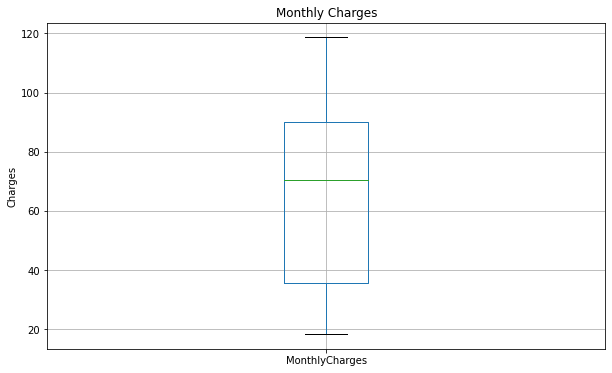

In [14]:
# Service usage - Monthly Charges
plt.figure(figsize=(10, 6))
training_data.boxplot(column='MonthlyCharges')
plt.title('Monthly Charges')
plt.ylabel('Charges')
plt.show()